In [1]:
import scanpy as sc
import pandas as pd


In [54]:
# adt = pd.read_csv('../data/st/stCITEseq/human tonsil/protein.tsv',index_col=0,sep='\t')
adt = pd.read_csv('../data/st/stCITEseq/humanthymus_protein.tsv',index_col=0,sep='\t')

In [55]:
adt.columns = [x.split('.')[0] for x in adt.columns]

In [56]:
import numpy as np
y = np.apply_along_axis(lambda x: np.log(x+1) - np.mean(np.log(x+1)),0,adt)   
x = pd.DataFrame(y, index=adt.index, columns=adt.columns)

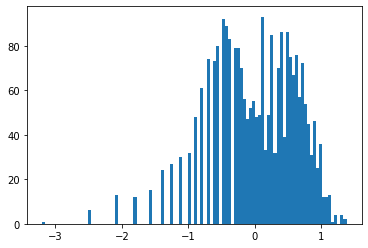

In [70]:
import matplotlib.pyplot as plt

plt.hist(x.loc[:,'CD3'],bins=100)
plt.show()

In [117]:
rna = sc.read_csv('../data/st/stCITEseq/human tonsil/RNA.tsv',delimiter='\t')

In [119]:
rna.obs_names

Index(['29x42', '44x36', '34x6', '42x19', '41x6', '41x39', '49x13', '25x28',
       '12x1', '16x11',
       ...
       '26x48', '31x26', '16x34', '19x34', '37x26', '2x26', '30x26', '23x48',
       '8x44', '5x44'],
      dtype='object', length=2492)

In [107]:
adata = sc.read_h5ad('../data/st/human lymph node/rna_sodb.h5ad')

In [116]:
adata.obs_names

Index(['AAACAAGTATCTCCCA-1', 'AAACAATCTACTAGCA-1', 'AAACACCAATAACTGC-1',
       'AAACAGAGCGACTCCT-1', 'AAACAGCTTTCAGAAG-1', 'AAACAGGGTCTATATT-1',
       'AAACAGTGTTCCTGGG-1', 'AAACATTTCCCGGATT-1', 'AAACCCGAACGAAATC-1',
       'AAACCGGGTAGGTACC-1',
       ...
       'TTGTGTTTCCCGAAAG-1', 'TTGTTAGCAAATTCGA-1', 'TTGTTCAGTGTGCTAC-1',
       'TTGTTGGCAATGACTG-1', 'TTGTTGTGTGTCAAGA-1', 'TTGTTTCACATCCAGG-1',
       'TTGTTTCATTAGTCTA-1', 'TTGTTTCCATACAACT-1', 'TTGTTTGTATTACACG-1',
       'TTGTTTGTGTAAATTC-1'],
      dtype='object', length=4035)

In [104]:
def scanpy_flow(adata,if_log=True):
    sc.settings.set_figure_params(dpi=80, facecolor='white')
    
    if if_log:
        sc.pp.normalize_total(adata, target_sum=1e4)
        sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(adata,min_disp=0.01)
    adata = adata[:,adata.var.highly_variable]
    sc.pp.scale(adata, max_value=10, zero_center=False)
    # adata.X = preprocessing.scale(adata.X)
    sc.tl.pca(adata, svd_solver='arpack',n_comps=50)
    # sc.pl.pca_variance_ratio(adata, log=True)
    sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
    sc.tl.umap(adata)
    return adata

In [106]:
adata_pp = scanpy_flow(adata.copy())

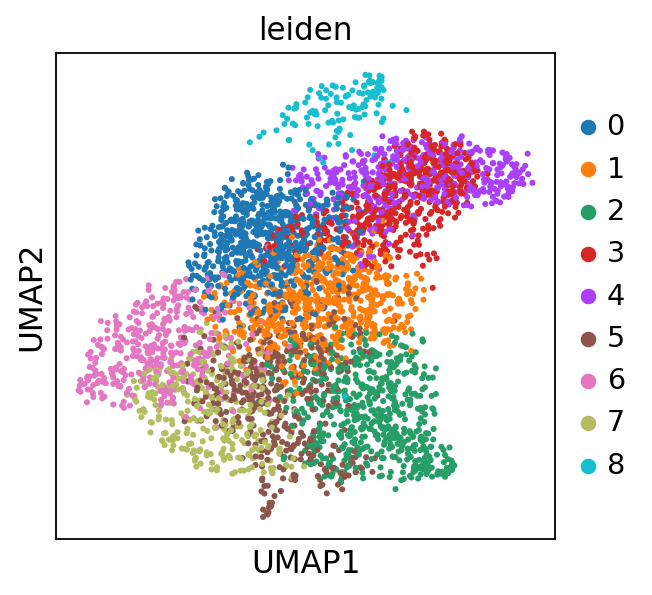

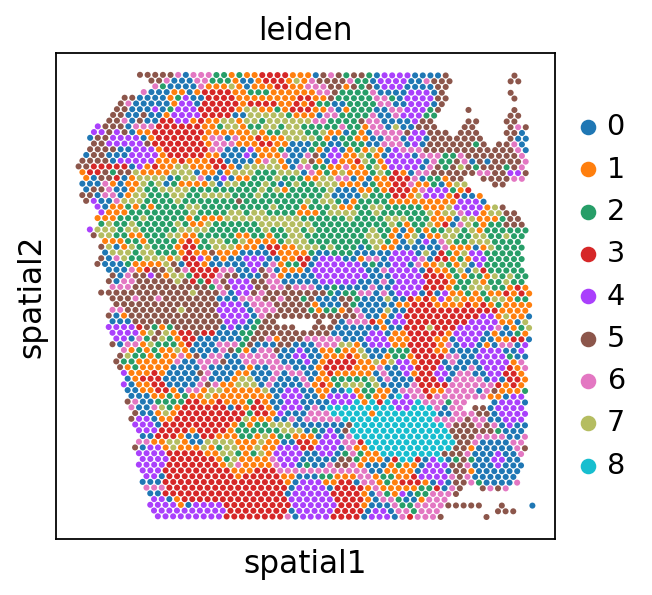

In [111]:
sc.pl.umap(adata,color=['leiden'])
sc.pl.embedding(adata,basis='spatial',color='leiden')

In [115]:
adata.X[:100,200:300].toarray()

array([[0., 0., 0., ..., 7., 3., 0.],
       [0., 0., 0., ..., 3., 1., 0.],
       [0., 0., 1., ..., 7., 0., 0.],
       ...,
       [0., 0., 0., ..., 4., 3., 0.],
       [0., 0., 0., ..., 2., 0., 0.],
       [0., 0., 1., ..., 4., 2., 0.]], dtype=float32)